In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('expand_frame_repr', False)

In [41]:
# Reading the input file

import os
cwd = os.getcwd()

train_values = cwd + "\\Source Data\\train_values.csv"
train_values = pd.read_csv(train_values)
train_labels = cwd + "\\Source Data\\train_labels.csv"
train_labels = pd.read_csv(train_labels)

test_values = cwd + "\\Source Data\\test_values.csv"
test_values = pd.read_csv(test_values)
test_id = test_values.patient_id
test = test_values.drop('patient_id', axis=1)

train = train_values.join(train_labels.set_index('patient_id'), on='patient_id', how='left')

In [42]:
# Data Prep

re_categorize_values = {"chest_pain_type": {1: "one", 2: "two", 3: "three", 4: "four"},
                       "fasting_blood_sugar_gt_120_mg_per_dl": {0: "Less than 120", 1: "Greater than 120"},
                       "resting_ekg_results": {1: "one", 2: "two", 0: "zero"},
                       "sex": {0: "female", 1: "male"},
                       "exercise_induced_angina": {0: "No", 1: "Yes"}}

train.replace(re_categorize_values, inplace=True)
test.replace(re_categorize_values, inplace=True)

y = train['heart_disease_present']
x = train.drop(['heart_disease_present', 'patient_id'], axis=1)

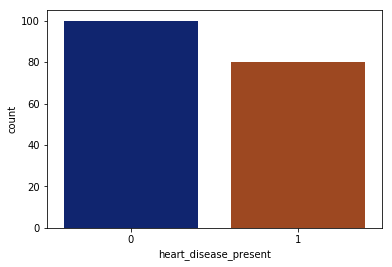

In [4]:
# Analyzing the train data

# train.isna().sum() # There are no missing values

# Checking the class imbalance

sns.countplot(train['heart_disease_present'], palette='dark')

# There is not much class imbalance. We may not need any over or under sampling

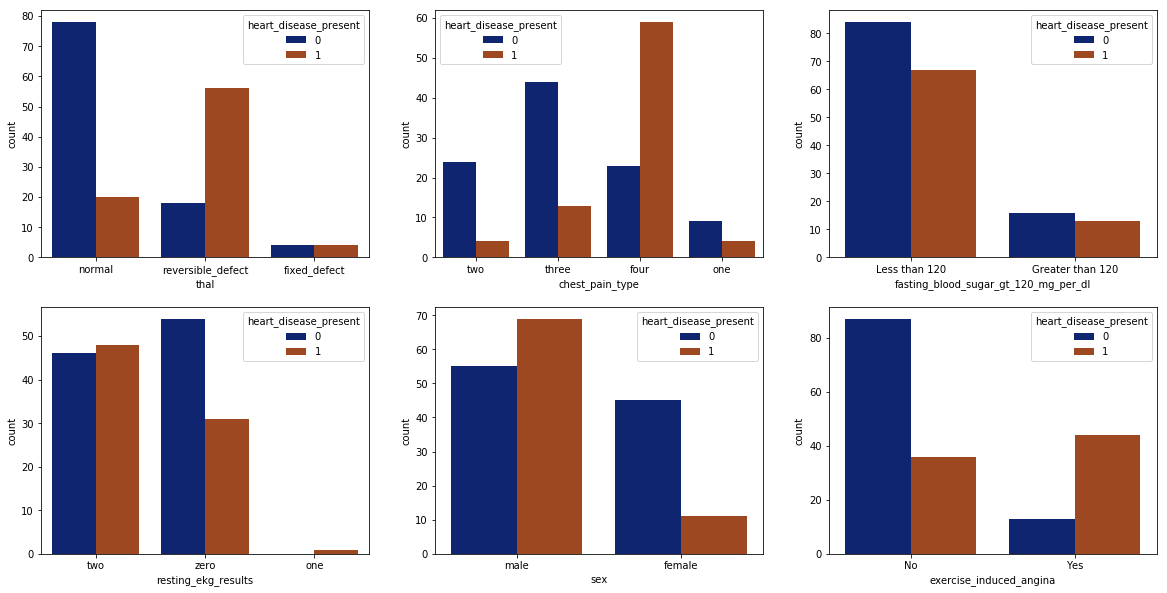

In [5]:
def generate_count_plots(x,y):
    import seaborn as sns
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    new_df = x.select_dtypes(include='object')
    total_cols = new_df.shape[1]
    item_counter = total_cols - 1
    
    # Generating the number of rows required
    
    rows = total_cols // 3
    remainder = total_cols%3
    
    if remainder != 0:
        rows = rows + 1
    
    # Generating code for the plots
    
    breadth = rows * 5
    plt.figure(figsize=(20,breadth))
    for i in range(total_cols):
        x_col = new_df.iloc[:,i]
        plt.subplot(rows, 3, i+1)
        sns.countplot(x_col, hue=y, palette='dark', dodge=True) # Try dodge=False for stacking, but numbers dont look right
        
    plt.show()

generate_count_plots(x,y)

From the above charts, there is a possibility that people that are male sex, and have type four chest pain type, and 
reversable defect thal, and exercise induced angina have high changes of having heart diseases

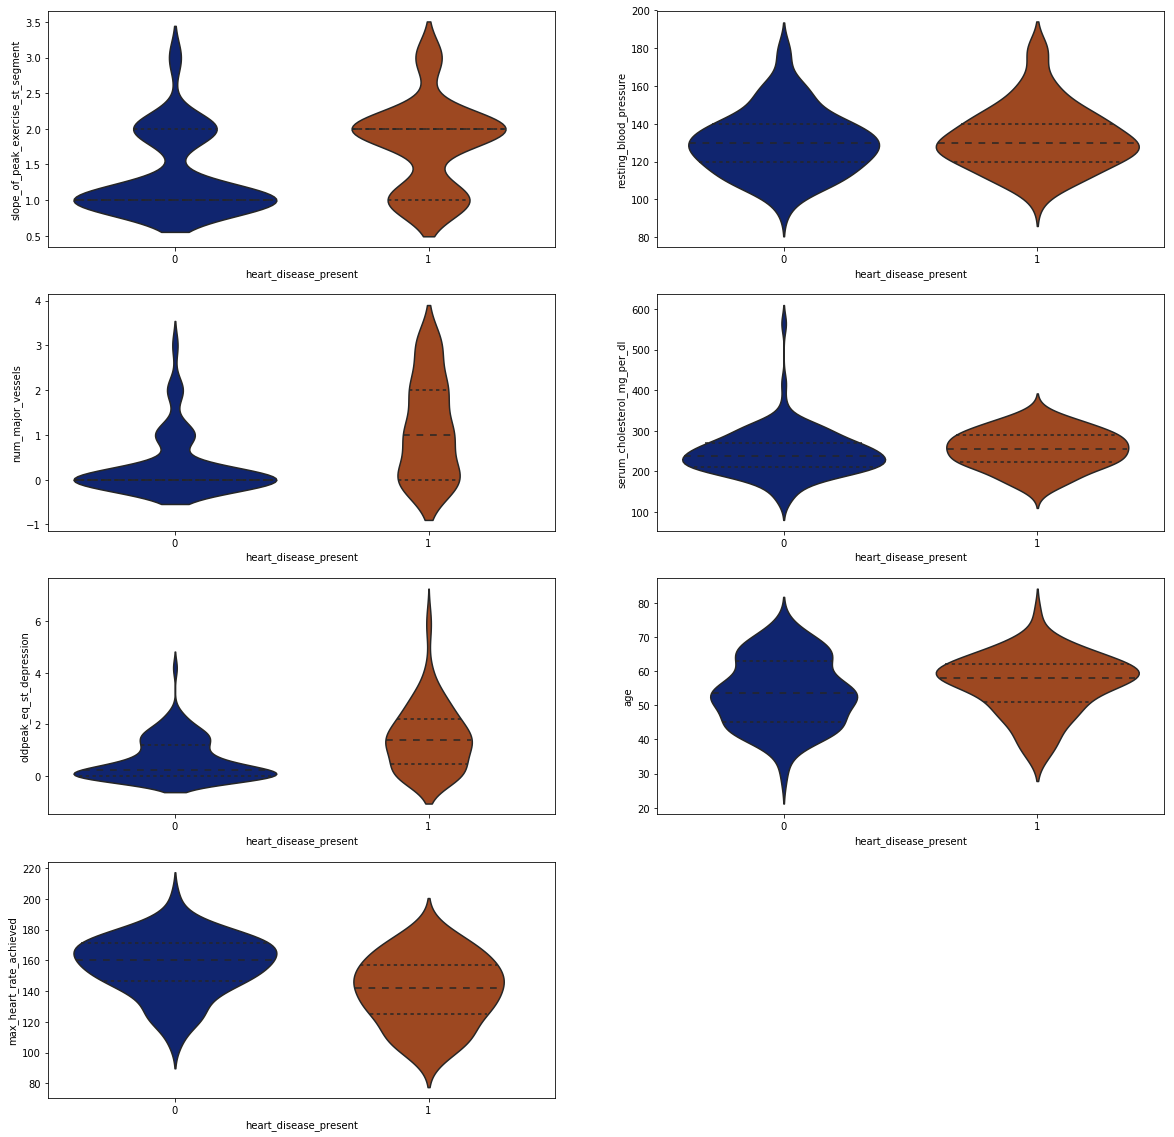

In [6]:
def generate_violin_plots(x,y):
    import seaborn as sns
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    cols_to_include = ['int64', 'float64']
    new_df = x.select_dtypes(include=cols_to_include)
    total_cols = new_df.shape[1]
    item_counter = total_cols - 1
    
    # Generating the number of rows required
    
    rows = total_cols // 2
    remainder = total_cols%2
    
    if remainder != 0:
        rows = rows + 1
    
    # Generating code for the plots
    
    breadth = rows * 5
    plt.figure(figsize=(20,breadth))
    for i in range(total_cols):
        x_col = new_df.iloc[:,i]
        plt.subplot(rows, 2, i+1)
        sns.violinplot(y=x_col, x=y, palette='dark', inner='quartile')
        
    plt.show()

generate_violin_plots(x,y)

# Analysis:

1. slope of peak exercise st segment: Heart disease is more pronounced with people having slope 2 or greater
2. Resting blood pressure does not have much effect on heart disease (interesting)
3. Number of major vessels greater than 0 are more likely to get heart disease
4. Serum cholesterol does not have much effect
5. Oldpeak_eq_st_depression: Greater than 0 is more likely to get heart disease
6. Age between 50 to 70 more likely to have heart disease
7. Maximum heart rate achieved: Less than 140 may have higher chance of heart disease (see if the max heart rate achieved has any relation to age i.e. compare the distribution by age)

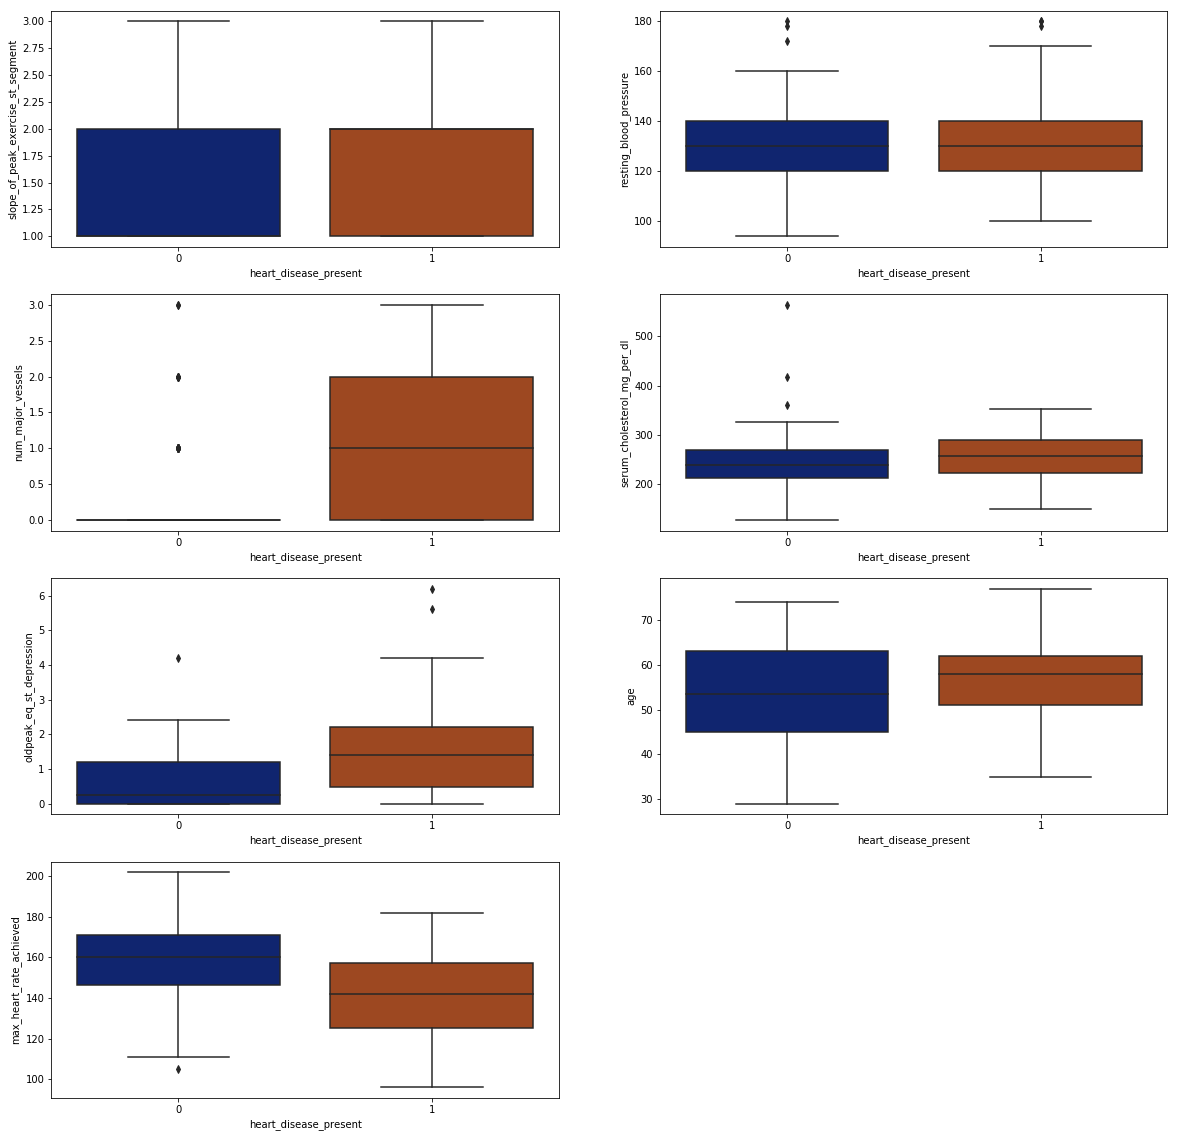

In [7]:
def generate_box_plots(x,y):
    import seaborn as sns
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    cols_to_include =  ['int64', 'float64']
    new_df = x.select_dtypes(include=cols_to_include)
    total_cols = new_df.shape[1]
    item_counter = total_cols - 1
    
    # Generating the number of rows required
    
    rows = total_cols // 2
    remainder = total_cols%2
    
    if remainder != 0:
        rows = rows + 1
    
    # Generating code for the plots
    #color_item = x['sex']
    breadth = rows * 5
    plt.figure(figsize=(20,breadth))
    for i in range(total_cols):
        x_col = new_df.iloc[:,i]
        plt.subplot(rows, 2, i+1)
        sns.boxplot(y=x_col, x=y, palette='dark')
        #sns.boxplot(y=x_col, x=y, palette='dark', hue=color_item)
    plt.show()

generate_box_plots(x,y)

# Fixing Outliers

In [43]:
# # Fixing outliers for the resting blood pressure
# uplimit = (1.5 * (x.resting_blood_pressure.quantile(0.75) - x.resting_blood_pressure.quantile(0.25))) + x.resting_blood_pressure.quantile(0.75)
# absense_lowlimit =  x.resting_blood_pressure[y==0].quantile(0.25) - (1.5 * (x.resting_blood_pressure[y==0].quantile(0.75) - x.resting_blood_pressure[y==0].quantile(0.25)))
# present_median_value = x['resting_blood_pressure'][y==1].median()
# absense_median_value = x['resting_blood_pressure'][y==0].median()


# x['resting_blood_pressure'] = np.where((y == 1) & (x.resting_blood_pressure > present_uplimit), present_median_value,
#                                        np.where((y == 1) & (x.resting_blood_pressure < present_lowlimit), present_median_value,
#                                                 np.where((y == 0) & (x.resting_blood_pressure > absense_uplimit), absense_median_value,
#                                                         np.where((y == 0) & (x.resting_blood_pressure < absense_lowlimit), absense_median_value, x.resting_blood_pressure))))


# # Fixing outliers for the major num of vessels
# present_uplimit = (1.5 * (x.num_major_vessels [y==1].quantile(0.75) - x.num_major_vessels[y==1].quantile(0.25))) + x.num_major_vessels[y==1].quantile(0.75)
# absense_uplimit = (1.5 * (x.num_major_vessels[y==0].quantile(0.75) - x.num_major_vessels[y==0].quantile(0.25))) + x.num_major_vessels[y==0].quantile(0.75)
# present_lowlimit =  x.num_major_vessels[y==1].quantile(0.25) - (1.5 * (x.num_major_vessels[y==1].quantile(0.75) - x.num_major_vessels[y==1].quantile(0.25)))
# absense_lowlimit =  x.num_major_vessels[y==0].quantile(0.25) - (1.5 * (x.num_major_vessels[y==0].quantile(0.75) - x.num_major_vessels[y==0].quantile(0.25)))
# present_median_value = x['num_major_vessels'][y==1].median()
# absense_median_value = x['num_major_vessels'][y==0].median()


# x['num_major_vessels'] = np.where((y == 1) & (x.num_major_vessels > present_uplimit), present_median_value,
#                                        np.where((y == 1) & (x.num_major_vessels < present_lowlimit), present_median_value,
#                                                 np.where((y == 0) & (x.num_major_vessels > absense_uplimit), absense_median_value,
#                                                         np.where((y == 0) & (x.num_major_vessels < absense_lowlimit), absense_median_value, x.num_major_vessels))))



# # Fixing serum cholesterol mg per dl

# present_uplimit = (1.5 * (x.serum_cholesterol_mg_per_dl[y==1].quantile(0.75) - x.serum_cholesterol_mg_per_dl[y==1].quantile(0.25))) + x.serum_cholesterol_mg_per_dl[y==1].quantile(0.75)
# absense_uplimit = (1.5 * (x.serum_cholesterol_mg_per_dl[y==0].quantile(0.75) - x.serum_cholesterol_mg_per_dl[y==0].quantile(0.25))) + x.serum_cholesterol_mg_per_dl[y==0].quantile(0.75)
# present_lowlimit =  x.serum_cholesterol_mg_per_dl[y==1].quantile(0.25) - (1.5 * (x.serum_cholesterol_mg_per_dl[y==1].quantile(0.75) - x.serum_cholesterol_mg_per_dl[y==1].quantile(0.25)))
# absense_lowlimit =  x.serum_cholesterol_mg_per_dl[y==0].quantile(0.25) - (1.5 * (x.serum_cholesterol_mg_per_dl[y==0].quantile(0.75) - x.serum_cholesterol_mg_per_dl[y==0].quantile(0.25)))
# present_median_value = x['serum_cholesterol_mg_per_dl'][y==1].median()
# absense_median_value = x['serum_cholesterol_mg_per_dl'][y==0].median()


# x['serum_cholesterol_mg_per_dl'] = np.where((y == 1) & (x.serum_cholesterol_mg_per_dl > present_uplimit), present_median_value,
#                                        np.where((y == 1) & (x.serum_cholesterol_mg_per_dl < present_lowlimit), present_median_value,
#                                                 np.where((y == 0) & (x.serum_cholesterol_mg_per_dl > absense_uplimit), absense_median_value,
#                                                         np.where((y == 0) & (x.serum_cholesterol_mg_per_dl < absense_lowlimit), absense_median_value, x.serum_cholesterol_mg_per_dl))))


# # Fixing old peak eq st depression

# present_uplimit = (1.5 * (x.oldpeak_eq_st_depression[y==1].quantile(0.75) - x.oldpeak_eq_st_depression[y==1].quantile(0.25))) + x.oldpeak_eq_st_depression[y==1].quantile(0.75)
# absense_uplimit = (1.5 * (x.oldpeak_eq_st_depression[y==0].quantile(0.75) - x.oldpeak_eq_st_depression[y==0].quantile(0.25))) + x.oldpeak_eq_st_depression[y==0].quantile(0.75)
# present_lowlimit =  x.oldpeak_eq_st_depression[y==1].quantile(0.25) - (1.5 * (x.oldpeak_eq_st_depression[y==1].quantile(0.75) - x.oldpeak_eq_st_depression[y==1].quantile(0.25)))
# absense_lowlimit =  x.oldpeak_eq_st_depression[y==0].quantile(0.25) - (1.5 * (x.oldpeak_eq_st_depression[y==0].quantile(0.75) - x.oldpeak_eq_st_depression[y==0].quantile(0.25)))
# present_median_value = x['oldpeak_eq_st_depression'][y==1].median()
# absense_median_value = x['oldpeak_eq_st_depression'][y==0].median()


# x['oldpeak_eq_st_depression'] = np.where((y == 1) & (x.oldpeak_eq_st_depression > present_uplimit), present_median_value,
#                                        np.where((y == 1) & (x.oldpeak_eq_st_depression < present_lowlimit), present_median_value,
#                                                 np.where((y == 0) & (x.oldpeak_eq_st_depression > absense_uplimit), absense_median_value,
#                                                         np.where((y == 0) & (x.oldpeak_eq_st_depression < absense_lowlimit), absense_median_value, x.oldpeak_eq_st_depression))))

# # Fixing max heart rate achieved

# present_uplimit = (1.5 * (x.max_heart_rate_achieved[y==1].quantile(0.75) - x.max_heart_rate_achieved[y==1].quantile(0.25))) + x.max_heart_rate_achieved[y==1].quantile(0.75)
# absense_uplimit = (1.5 * (x.max_heart_rate_achieved[y==0].quantile(0.75) - x.max_heart_rate_achieved[y==0].quantile(0.25))) + x.max_heart_rate_achieved[y==0].quantile(0.75)
# present_lowlimit =  x.max_heart_rate_achieved[y==1].quantile(0.25) - (1.5 * (x.max_heart_rate_achieved[y==1].quantile(0.75) - x.max_heart_rate_achieved[y==1].quantile(0.25)))
# absense_lowlimit =  x.max_heart_rate_achieved[y==0].quantile(0.25) - (1.5 * (x.max_heart_rate_achieved[y==0].quantile(0.75) - x.max_heart_rate_achieved[y==0].quantile(0.25)))
# present_median_value = x['max_heart_rate_achieved'][y==1].median()
# absense_median_value = x['max_heart_rate_achieved'][y==0].median()


# x['max_heart_rate_achieved'] = np.where((y == 1) & (x.max_heart_rate_achieved > present_uplimit), present_median_value,
#                                        np.where((y == 1) & (x.max_heart_rate_achieved < present_lowlimit), present_median_value,
#                                                 np.where((y == 0) & (x.max_heart_rate_achieved > absense_uplimit), absense_median_value,
#                                                         np.where((y == 0) & (x.max_heart_rate_achieved < absense_lowlimit), absense_median_value, x.max_heart_rate_achieved))))


In [44]:
# Fixing outliers for the resting blood pressure
uplimit = (1.5 * (x.resting_blood_pressure.quantile(0.75) - x.resting_blood_pressure.quantile(0.25))) + x.resting_blood_pressure.quantile(0.75)
lowlimit =  x.resting_blood_pressure.quantile(0.25) - (1.5 * (x.resting_blood_pressure.quantile(0.75) - x.resting_blood_pressure.quantile(0.25)))
median_value = x['resting_blood_pressure'].median()

x['resting_blood_pressure'] = np.where((x.resting_blood_pressure > uplimit) | (x.resting_blood_pressure < lowlimit), median_value, x.resting_blood_pressure)
test['resting_blood_pressure'] = np.where((test.resting_blood_pressure > uplimit) | (test.resting_blood_pressure < lowlimit), median_value, test.resting_blood_pressure)

# Fixing outliers for the major num of vessels
uplimit = (1.5 * (x.num_major_vessels.quantile(0.75) - x.num_major_vessels.quantile(0.25))) + x.num_major_vessels.quantile(0.75)
lowlimit =  x.num_major_vessels.quantile(0.25) - (1.5 * (x.num_major_vessels.quantile(0.75) - x.num_major_vessels.quantile(0.25)))
median_value = x['num_major_vessels'].median()

x['num_major_vessels'] = np.where((x.num_major_vessels > uplimit) | (x.num_major_vessels < lowlimit), median_value, x.num_major_vessels)
test['num_major_vessels'] = np.where((test.num_major_vessels > uplimit) | (test.num_major_vessels < lowlimit), median_value, test.num_major_vessels)

# Fixing serum cholesterol mg per dl
uplimit = (1.5 * (x.serum_cholesterol_mg_per_dl.quantile(0.75) - x.serum_cholesterol_mg_per_dl.quantile(0.25))) + x.serum_cholesterol_mg_per_dl.quantile(0.75)
lowlimit =  x.serum_cholesterol_mg_per_dl.quantile(0.25) - (1.5 * (x.serum_cholesterol_mg_per_dl.quantile(0.75) - x.serum_cholesterol_mg_per_dl.quantile(0.25)))
median_value = x['serum_cholesterol_mg_per_dl'].median()

x['serum_cholesterol_mg_per_dl'] = np.where((x.serum_cholesterol_mg_per_dl > uplimit) | (x.serum_cholesterol_mg_per_dl < lowlimit), median_value, x.serum_cholesterol_mg_per_dl)
test['serum_cholesterol_mg_per_dl'] = np.where((test.serum_cholesterol_mg_per_dl > uplimit) | (test.serum_cholesterol_mg_per_dl < lowlimit), median_value, test.serum_cholesterol_mg_per_dl)

# Fixing old peak eq st depression
uplimit = (1.5 * (x.oldpeak_eq_st_depression.quantile(0.75) - x.oldpeak_eq_st_depression.quantile(0.25))) + x.oldpeak_eq_st_depression.quantile(0.75)
lowlimit =  x.oldpeak_eq_st_depression.quantile(0.25) - (1.5 * (x.oldpeak_eq_st_depression.quantile(0.75) - x.oldpeak_eq_st_depression.quantile(0.25)))
median_value = x['oldpeak_eq_st_depression'].median()

x['oldpeak_eq_st_depression'] = np.where((x.oldpeak_eq_st_depression > uplimit) | (x.oldpeak_eq_st_depression < lowlimit), median_value, x.oldpeak_eq_st_depression)
test['oldpeak_eq_st_depression'] = np.where((test.oldpeak_eq_st_depression > uplimit) | (test.oldpeak_eq_st_depression < lowlimit), median_value, test.oldpeak_eq_st_depression)

# Fixing max heart rate achieved
uplimit = (1.5 * (x.max_heart_rate_achieved.quantile(0.75) - x.max_heart_rate_achieved.quantile(0.25))) + x.max_heart_rate_achieved.quantile(0.75)
lowlimit =  x.max_heart_rate_achieved.quantile(0.25) - (1.5 * (x.max_heart_rate_achieved.quantile(0.75) - x.max_heart_rate_achieved.quantile(0.25)))
median_value = x['max_heart_rate_achieved'].median()

x['max_heart_rate_achieved'] = np.where((x.max_heart_rate_achieved > uplimit) | (x.max_heart_rate_achieved < lowlimit), median_value, x.max_heart_rate_achieved)
test['max_heart_rate_achieved'] = np.where((test.max_heart_rate_achieved > uplimit) | (test.max_heart_rate_achieved < lowlimit), median_value, test.max_heart_rate_achieved)


# Feature Engineering

In [45]:
x['heart_risk'] = np.where(x.sex == 'male',0.25,0) + np.where(x.chest_pain_type == 'four',0.5,0) + np.where(x.exercise_induced_angina == 'Yes',0.5,0) + np.where(x.thal == 'reversible_defect',0.5,0) + np.where(x.slope_of_peak_exercise_st_segment >= 2,1,0) + np.where(x.num_major_vessels > 0, 1,0) + np.where(x.oldpeak_eq_st_depression > 0, 1,0) + np.where((x.age > 50) & (x.age < 70),0.5,0) + np.where(x.max_heart_rate_achieved < 140 , 1,0) 
test['heart_risk'] = np.where(test.sex == 'male',0.25,0) + np.where(test.chest_pain_type == 'four',0.5,0) + np.where(test.exercise_induced_angina == 'Yes',0.5,0) + np.where(test.thal == 'reversible_defect',0.5,0) + np.where(test.slope_of_peak_exercise_st_segment >= 2,1,0) + np.where(test.num_major_vessels > 0, 1,0) + np.where(test.oldpeak_eq_st_depression > 0, 1,0) + np.where((test.age > 50) & (test.age < 70),0.5,0) + np.where(test.max_heart_rate_achieved < 140 , 1,0) 


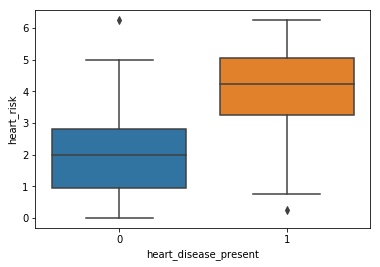

In [11]:
sns.boxplot(y=x['heart_risk'], x=y)

In [46]:
x = pd.get_dummies(x)
test = pd.get_dummies(test)

In [13]:
# Train and Validation Split

from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation = train_test_split(x,y, stratify=y, random_state=1, test_size=0.25)

In [14]:
# Selecting only important columns

selected_cols = ['heart_risk', 'thal_normal', 'chest_pain_type_four', 'thal_reversible_defect', 'max_heart_rate_achieved',
 'exercise_induced_angina_No', 'sex_male', 'serum_cholesterol_mg_per_dl', 'age', 'oldpeak_eq_st_depression', 'sex_female',
'exercise_induced_angina_Yes', 'resting_blood_pressure', 'num_major_vessels', 'slope_of_peak_exercise_st_segment',
'chest_pain_type_three', 'resting_ekg_results_zero', 'resting_ekg_results_two', 'chest_pain_type_two']

x_train = x_train[selected_cols]
x_validation = x_validation[selected_cols]
#test = test[selected_cols]

In [15]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=40, min_samples_split=5,min_samples_leaf=4, max_features=5, max_depth = 8,
                               criterion='gini', bootstrap=False, n_jobs=-1, random_state=10, class_weight='balanced')

# Training the model

model.fit(x_train, y_train)
train_predictions = model.predict(x_train)
predictions = model.predict(x_validation)

# Confusion Matrix and Report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Confusion Matrix Comparison
print("Confustion Matrix for Training Data")
print(confusion_matrix(y_train, train_predictions))
print("Confustion Matrix for Test Data")
print(confusion_matrix(y_validation, predictions))

# Classification Report Comparison
print("Classification Report for Training Data")
print(classification_report(y_train, train_predictions))
print("Classification Report for Test Data")
print(classification_report(y_validation, predictions))

# AUC ROC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

predictions = model.predict_proba(x_validation)[:,1]
roc_auc_score(y_validation, predictions, average='weighted')

fpr, tpr, threshold = roc_curve(y_validation, predictions)

# Calculating the AUC Score
auc = np.trapz(tpr,fpr)
print("AUROC Plot:", "%.4f" %auc)

Confustion Matrix for Training Data
[[70  5]
 [ 2 58]]
Confustion Matrix for Test Data
[[18  7]
 [ 4 16]]
Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        75
           1       0.92      0.97      0.94        60

   micro avg       0.95      0.95      0.95       135
   macro avg       0.95      0.95      0.95       135
weighted avg       0.95      0.95      0.95       135

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        25
           1       0.70      0.80      0.74        20

   micro avg       0.76      0.76      0.76        45
   macro avg       0.76      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45

AUROC Plot: 0.8500


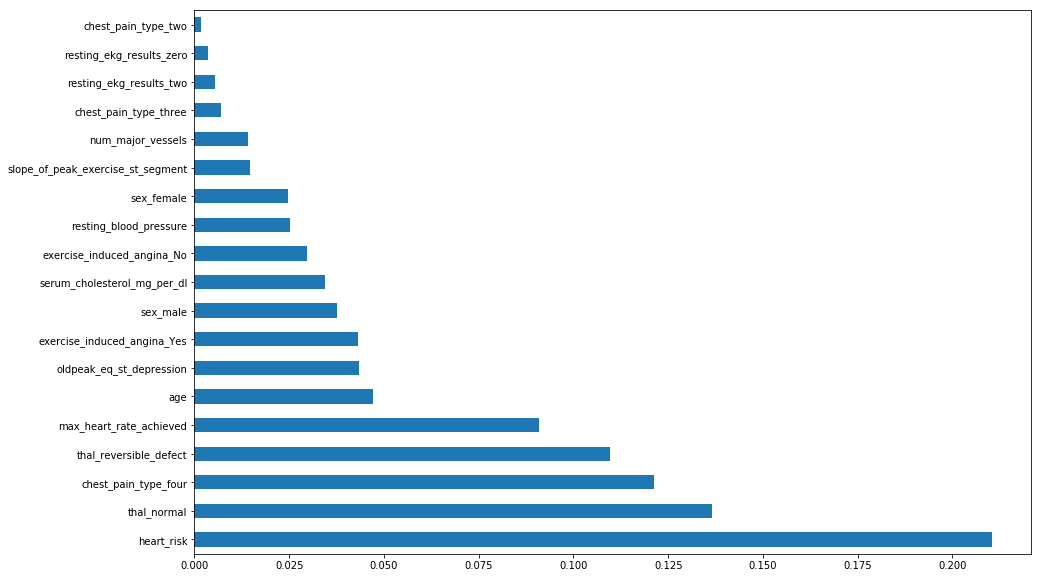

In [16]:
# # Feature Importance Graph

plt.figure(figsize=(15,10))
feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(105).plot(kind='barh')



In [17]:
# Running a Naive Bayes Guassian Model:
# Guassian model because the predictors follow a Normal Distribution

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Training the model using the training data

model.fit(x_train, y_train)
train_predictions = model.predict(x_train)
predictions = model.predict(x_validation)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Confusion Matrix Comparison
print("Confustion Matrix for Training Data")
print(confusion_matrix(y_train, train_predictions))
print("Confustion Matrix for Test Data")
print(confusion_matrix(y_validation, predictions))

# Classification Report Comparison
print("Classification Report for Training Data")
print(classification_report(y_train, train_predictions))
print("Classification Report for Test Data")
print(classification_report(y_validation, predictions))

Confustion Matrix for Training Data
[[67  8]
 [11 49]]
Confustion Matrix for Test Data
[[14 11]
 [ 4 16]]
Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        75
           1       0.86      0.82      0.84        60

   micro avg       0.86      0.86      0.86       135
   macro avg       0.86      0.85      0.86       135
weighted avg       0.86      0.86      0.86       135

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.78      0.56      0.65        25
           1       0.59      0.80      0.68        20

   micro avg       0.67      0.67      0.67        45
   macro avg       0.69      0.68      0.67        45
weighted avg       0.70      0.67      0.66        45



AUROC Plot: 0.8420


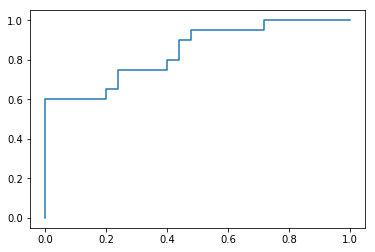

In [18]:
# AUC ROC CURVE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

predictions = model.predict_proba(x_validation)[:,1]
roc_auc_score(y_validation, predictions, average='weighted')

fpr, tpr, threshold = roc_curve(y_validation, predictions)

# Calculating the AUC Score
auc = np.trapz(tpr,fpr)
pltTitle = print("AUROC Plot:", "%.4f" %auc)

# Plotting the ROC Curve
plt.plot(fpr,tpr)
plt.title(pltTitle)
plt.show()

In [19]:
# Applying Model for Test Data

predictions = model.predict_proba(test)#[:,1]

# Standardizing data using Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0.1,0.99))
predictions = scaler.fit_transform(predictions)
predictions = predictions[:,1]


output = pd.DataFrame({'patient_id': test_id, 'heart_disease_present':predictions})
output.to_csv(cwd + "\\Output Data\\Submission 1 - NB with RF Features 0.84 AUC.csv", index=False)

# XGBOOST IMPLEMENTATION

In [20]:
# Importing required libraries

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_validate

# Fix learning rate and number of estimators for tuning tree-based parameters

In [21]:
def modelfit(alg, x, y, useTrainCV=True, cv_folds=5, early_stopping_rounds=50, metric='logloss'):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(x.values, label=y.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics=metric, early_stopping_rounds=early_stopping_rounds, verbose_eval =False, show_stdv=True )
        alg.set_params(n_estimators=cvresult.shape[0])
        best_nrounds = int((cvresult.shape[0] - early_stopping_rounds) / (1 - 1 / cv_folds))
    
    #Fit the algorithm on the data
    alg.fit(x, y,eval_metric=metric)
        
    #Predict training set:
    dtrain_predictions = alg.predict(x)
    dtrain_predprob = alg.predict_proba(x)[:,1]
    
    #Predict test set:
    #validations_predictions = alg.predict(x_validation)
    #validations_predprob = alg.predict_proba(x_validation)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
    print ("Best Iteration: %5d" % best_nrounds)
    #print ("Accuracy : %.4g" % metrics.accuracy_score(y_validation.values, validations_predictions))
    #print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_validation, validations_predprob))
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    


Model Report
Accuracy : 0.9167
AUC Score (Train): 0.983812
Best Iteration:    62


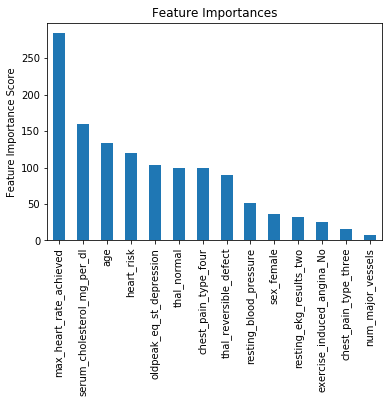

In [22]:
#Choose all predictors except target & IDcols
predictors = [x for x in x_train.columns] # [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate = 0.01,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 #subsample=0.8,
 #colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=8,
 scale_pos_weight=1,
 seed=9)

modelfit(xgb1, x, y, metric='logloss')

# Tuning Max Depth and Min Child Weight

In [23]:
param_test1 = {
 'max_depth':range(3,9,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate = 0.01, n_estimators=62, max_depth=5,
 min_child_weight=1, gamma=0, objective= 'binary:logistic', nthread=8, scale_pos_weight=1, seed=9), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=50,iid=False, cv=5)
gsearch1.fit(x,y)
print("Best Params: %r" % gsearch1.best_params_)
print("Best Score: %1.4f\n" % gsearch1.best_score_)

means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']): 
    print("Mean: %0.4f | Std: %0.4f | Params:  %r" % (mean, std * 2, params))

Best Params: {'max_depth': 3, 'min_child_weight': 5}
Best Score: 0.8728

Mean: 0.8644 | Std: 0.1536 | Params:  {'max_depth': 3, 'min_child_weight': 1}
Mean: 0.8619 | Std: 0.1312 | Params:  {'max_depth': 3, 'min_child_weight': 3}
Mean: 0.8728 | Std: 0.1019 | Params:  {'max_depth': 3, 'min_child_weight': 5}
Mean: 0.8572 | Std: 0.1781 | Params:  {'max_depth': 5, 'min_child_weight': 1}
Mean: 0.8684 | Std: 0.1205 | Params:  {'max_depth': 5, 'min_child_weight': 3}
Mean: 0.8728 | Std: 0.1019 | Params:  {'max_depth': 5, 'min_child_weight': 5}
Mean: 0.8584 | Std: 0.1810 | Params:  {'max_depth': 7, 'min_child_weight': 1}
Mean: 0.8684 | Std: 0.1205 | Params:  {'max_depth': 7, 'min_child_weight': 3}
Mean: 0.8728 | Std: 0.1019 | Params:  {'max_depth': 7, 'min_child_weight': 5}


# Further tuning the best parameters

From the above grid search, we can see that the optimized value for max depth is 3, and for min_child_weight is 5. Since, the gaps were wider, let us further close the gaps and run an narrower search

In [24]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[4,5,6]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=62, max_depth=5,
 min_child_weight=1, gamma=0, objective= 'binary:logistic', nthread=8, scale_pos_weight=1, seed=9), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=50,iid=False, cv=5)
gsearch1.fit(x,y)
print("Best Params: %r" % gsearch1.best_params_)
print("Best Score: %1.4f\n" % gsearch1.best_score_)

means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']): 
    print("Mean: %0.4f | Std: %0.4f | Params:  %r" % (mean, std * 2, params))

Best Params: {'max_depth': 2, 'min_child_weight': 4}
Best Score: 0.8806

Mean: 0.8806 | Std: 0.1260 | Params:  {'max_depth': 2, 'min_child_weight': 4}
Mean: 0.8784 | Std: 0.1247 | Params:  {'max_depth': 2, 'min_child_weight': 5}
Mean: 0.8797 | Std: 0.1098 | Params:  {'max_depth': 2, 'min_child_weight': 6}
Mean: 0.8697 | Std: 0.1192 | Params:  {'max_depth': 3, 'min_child_weight': 4}
Mean: 0.8728 | Std: 0.1019 | Params:  {'max_depth': 3, 'min_child_weight': 5}
Mean: 0.8731 | Std: 0.0995 | Params:  {'max_depth': 3, 'min_child_weight': 6}
Mean: 0.8716 | Std: 0.1201 | Params:  {'max_depth': 4, 'min_child_weight': 4}
Mean: 0.8728 | Std: 0.1019 | Params:  {'max_depth': 4, 'min_child_weight': 5}
Mean: 0.8731 | Std: 0.0995 | Params:  {'max_depth': 4, 'min_child_weight': 6}


Now let us try for additional min_child_weight values

In [25]:
param_test2 = {
 'min_child_weight':[1,2,3,7,8,9,10,11,12]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=62, max_depth=2,
 min_child_weight=1, gamma=0, objective= 'binary:logistic', nthread=8, scale_pos_weight=1, seed=9), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=50,iid=False, cv=5)
gsearch1.fit(x,y)
print("Best Params: %r" % gsearch1.best_params_)
print("Best Score: %1.4f\n" % gsearch1.best_score_)

means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']): 
    print("Mean: %0.4f | Std: %0.4f | Params:  %r" % (mean, std * 2, params))

Best Params: {'min_child_weight': 1}
Best Score: 0.8822

Mean: 0.8822 | Std: 0.1230 | Params:  {'min_child_weight': 1}
Mean: 0.8791 | Std: 0.1269 | Params:  {'min_child_weight': 2}
Mean: 0.8806 | Std: 0.1242 | Params:  {'min_child_weight': 3}
Mean: 0.8787 | Std: 0.1252 | Params:  {'min_child_weight': 7}
Mean: 0.8578 | Std: 0.1352 | Params:  {'min_child_weight': 8}
Mean: 0.8372 | Std: 0.1230 | Params:  {'min_child_weight': 9}
Mean: 0.8313 | Std: 0.1210 | Params:  {'min_child_weight': 10}
Mean: 0.8287 | Std: 0.1249 | Params:  {'min_child_weight': 11}
Mean: 0.8472 | Std: 0.1739 | Params:  {'min_child_weight': 12}


From the above tuning, let us take the max depth as 2, and the min_child_weight as 1. 
Let us now tune the gamma values

In [28]:
param_test = {
 'gamma':[i/10.0 for i in range(0,10)]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=62, max_depth=2,
 min_child_weight=1, objective= 'binary:logistic', nthread=8, scale_pos_weight=1, seed=9), 
 param_grid = param_test, scoring='roc_auc',n_jobs=50,iid=False, cv=5)
gsearch1.fit(x,y)
print("Best Params: %r" % gsearch1.best_params_)
print("Best Score: %1.4f\n" % gsearch1.best_score_)

means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']): 
    print("Mean: %0.4f | Std: %0.4f | Params:  %r" % (mean, std * 2, params))

Best Params: {'gamma': 0.0}
Best Score: 0.8822

Mean: 0.8822 | Std: 0.1230 | Params:  {'gamma': 0.0}
Mean: 0.8822 | Std: 0.1230 | Params:  {'gamma': 0.1}
Mean: 0.8822 | Std: 0.1230 | Params:  {'gamma': 0.2}
Mean: 0.8822 | Std: 0.1230 | Params:  {'gamma': 0.3}
Mean: 0.8822 | Std: 0.1230 | Params:  {'gamma': 0.4}
Mean: 0.8822 | Std: 0.1230 | Params:  {'gamma': 0.5}
Mean: 0.8822 | Std: 0.1230 | Params:  {'gamma': 0.6}
Mean: 0.8822 | Std: 0.1230 | Params:  {'gamma': 0.7}
Mean: 0.8822 | Std: 0.1230 | Params:  {'gamma': 0.8}
Mean: 0.8822 | Std: 0.1230 | Params:  {'gamma': 0.9}


Tuning Regularization Parameters

In [29]:
param_test = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=62, max_depth=2,
 min_child_weight=1, gamma=0, objective= 'binary:logistic', nthread=8, scale_pos_weight=1, seed=9), 
 param_grid = param_test, scoring='roc_auc',n_jobs=50,iid=False, cv=5)
gsearch1.fit(x,y)
print("Best Params: %r" % gsearch1.best_params_)
print("Best Score: %1.4f\n" % gsearch1.best_score_)

means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']): 
    print("Mean: %0.4f | Std: %0.4f | Params:  %r" % (mean, std * 2, params))

Best Params: {'reg_alpha': 1}
Best Score: 0.8872

Mean: 0.8822 | Std: 0.1230 | Params:  {'reg_alpha': 1e-05}
Mean: 0.8822 | Std: 0.1230 | Params:  {'reg_alpha': 0.01}
Mean: 0.8822 | Std: 0.1230 | Params:  {'reg_alpha': 0.1}
Mean: 0.8872 | Std: 0.1223 | Params:  {'reg_alpha': 1}
Mean: 0.5000 | Std: 0.0000 | Params:  {'reg_alpha': 100}


Regularization alpha 1 has higher accuracy. Let us further optimize by trying aplha values closer to 1

In [30]:
param_test = {
 'reg_alpha':[0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.01, n_estimators=62, max_depth=2,
 min_child_weight=1, gamma=0, objective= 'binary:logistic', nthread=8, scale_pos_weight=1, seed=9), 
 param_grid = param_test, scoring='roc_auc',n_jobs=50,iid=False, cv=5)
gsearch1.fit(x,y)
print("Best Params: %r" % gsearch1.best_params_)
print("Best Score: %1.4f\n" % gsearch1.best_score_)

means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']): 
    print("Mean: %0.4f | Std: %0.4f | Params:  %r" % (mean, std * 2, params))

Best Params: {'reg_alpha': 1}
Best Score: 0.8872

Mean: 0.8822 | Std: 0.1230 | Params:  {'reg_alpha': 0.25}
Mean: 0.8850 | Std: 0.1244 | Params:  {'reg_alpha': 0.5}
Mean: 0.8856 | Std: 0.1231 | Params:  {'reg_alpha': 0.75}
Mean: 0.8872 | Std: 0.1223 | Params:  {'reg_alpha': 1}
Mean: 0.8872 | Std: 0.1223 | Params:  {'reg_alpha': 1.25}
Mean: 0.8872 | Std: 0.1223 | Params:  {'reg_alpha': 1.5}
Mean: 0.8869 | Std: 0.1229 | Params:  {'reg_alpha': 1.75}


Let us finalize the alpha value to be 1


Model Report
Accuracy : 0.8556
AUC Score (Train): 0.900250
Best Iteration:    15


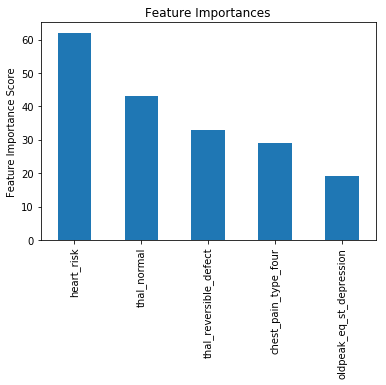

In [31]:
#Choose all predictors except target & IDcols
predictors = [x for x in x_train.columns] # [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate = 0.01,
 n_estimators=62,
 max_depth=2,
 min_child_weight=1,
 gamma=0,
 #subsample=0.8,
 #colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=8,
 scale_pos_weight=1,
 reg_alpha=1,
 seed=9)

modelfit(xgb1, x, y, metric='logloss')

In [47]:
xgb_param = xgb1.get_xgb_params()
xgtrain = xgb.DMatrix(x.values, label=y.values)
cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=xgb1.get_params()['n_estimators'], nfold=5,
metrics='logloss', early_stopping_rounds=50, verbose_eval =False, show_stdv=True )
xgb1.set_params(n_estimators=cvresult.shape[0])
best_nrounds = int((cvresult.shape[0] - 50) / (1 - 1 / 5))
    
#Fit the algorithm on the data
xgb1.fit(x, y,eval_metric='logloss')
        
#Predict training set:
dtrain_predictions = xgb1.predict(x)
dtrain_predprob = xgb1.predict_proba(x)[:,1]
dtest_predProb = xgb1.predict_proba(test)[:,1]

#Predict test set:
#validations_predictions = alg.predict(x_validation)
#validations_predprob = alg.predict_proba(x_validation)[:,1]
        


In [48]:
output = pd.DataFrame({'patient_id': test_id, 'heart_disease_present':dtest_predProb})
output.to_csv(cwd + "\\Output Data\\Submission 2 - XGBoost 0.90 AUC.csv", index=False)

In [39]:
len(dtest_predProb)

180

In [26]:
# https://www.kaggle.com/cast42/xg-cv
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
# https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/
# https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/
# https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/beginners-tutorial-on-xgboost-parameter-tuning-r/tutorial/
